## Lab1 Machine Learning Balumatkina DA-01

#### initializyng all functions + libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
toler = 0.000001
learn_rate = 0.007

def scan_data(file):
    return np.genfromtxt(file, delimiter=",", skip_header=1)


def mse_loss_function(database_row, predicted_row):
    result = sum((predicted_row[i] - database_row[i]) ** 2 for i in range(len(predicted_row)))
    return result / len(predicted_row)


def linear_regression(b0, b1, x):
    return b0 + np.multiply(b1, x)

In [3]:
def db_plot(data, plot_color, title):
    x_data, y_data = list(data[:, 1]), list(data[:, 2])
    plt.title(title)
    plt.plot(x_data, y_data, plot_color)

def total_plot(x_train, y_train, x_test, y_test, train_color, test_color, train_model_work, title):
  plt.title(title)
  plt.xlabel('x values') 
  plt.ylabel('y values') 
  plt.plot(x_train, y_train, train_color,
         x_test, y_test, test_color,
         [0, 1], [linear_regression(train_model_work["beta 0"], train_model_work["beta 1"], 0), linear_regression(train_model_work["beta 0"], train_model_work["beta 1"], 1)])

In [4]:
def train(rows):
    epoch_numb = 0
    delta = 100

    b0 = np.random.randn(1)
    b1 = np.random.randn(1)

    x_column = rows[:, 1]
    y_column =  rows[:, 2]

    y_predict = [linear_regression(b0, b1, x) for x in x_column]
    loss = mse_loss_function(y_column, y_predict)
   
    while toler < delta:
        y_predict = [linear_regression(b0, b1, x) for x in x_column]
        y_difference = [(expected - predicted) for (expected, predicted) in zip(y_column, y_predict)]

        b0_derivative = - (2 / len(y_difference)) * np.sum(y_difference)
        sum_value = np.dot(x_column, y_difference)
        b1_derivative = - (2 / len(y_difference)) * sum_value

        b0 = b0 - learn_rate * b0_derivative
        b1 = b1 - learn_rate * b1_derivative

        y_predict = [linear_regression(b0, b1, x) for x in x_column]
        current_loss = mse_loss_function(y_column, y_predict)
        delta = loss - current_loss
        loss = current_loss

        print(f"epoch #{epoch_numb}: beta 0 = {b0[0]} | beta 1 = {b1[0]} | mse loss = {current_loss[0]}")
        
        epoch_numb += 1

    return {
        "beta 0": b0[0],
        "beta 1": b1[0],
        "epoch amount": epoch_numb,
        "mse loss function value": loss[0]
    }

#### analyzing training database + building graph

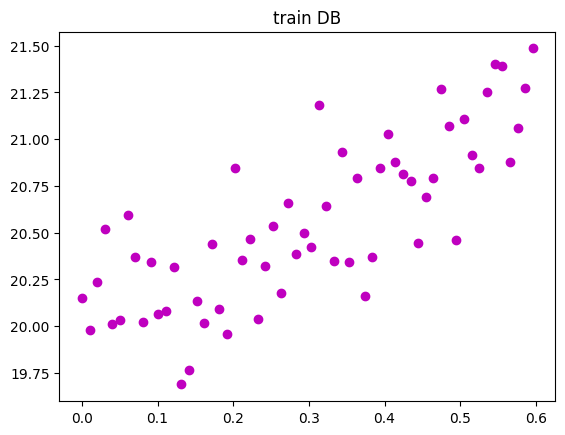

In [5]:
train_DB = scan_data("lab_1_train.csv")
db_plot(train_DB, 'mo', "train DB")

#### analyzing test database + building graph

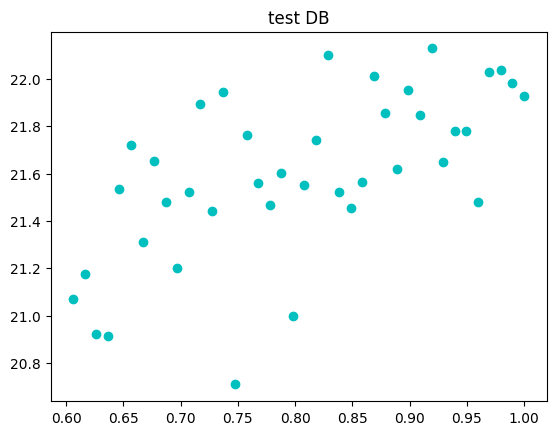

In [6]:
test_DB = scan_data("lab_1_test.csv")
db_plot(test_DB, 'co', "test DB")

#### training

In [7]:
train_model_work = train(train_DB)
train_model_work

epoch #0: beta 0 = -1.717947325215143 | beta 1 = -0.9654347811626829 | mse loss = 509.0749163655453
epoch #1: beta 0 = -1.4021746571328433 | beta 1 = -0.8700795760712677 | mse loss = 493.65008858076186
epoch #2: beta 0 = -1.0912206013501884 | beta 1 = -0.7762010710956323 | mse loss = 478.6930020694169
epoch #3: beta 0 = -0.7850115369197526 | beta 1 = -0.6837766960496092 | mse loss = 464.18947284111323
epoch #4: beta 0 = -0.48347496774380755 | beta 1 = -0.5927842255987802 | mse loss = 450.1257470271534
epoch #5: beta 0 = -0.18653950538780245 | beta 1 = -0.5032017739915023 | mse loss = 436.48848783733735
epoch #6: beta 0 = 0.10586514784356393 | beta 1 = -0.41500778987043996 | mse loss = 423.2647629122849
epoch #7: beta 0 = 0.39380821557169127 | beta 1 = -0.3281810511633697 | mse loss = 410.4420320592945
epoch #8: beta 0 = 0.6773578637547963 | beta 1 = -0.24270066005204943 | mse loss = 398.00813536010435
epoch #9: beta 0 = 0.9565812168478938 | beta 1 = -0.1585460380179572 | mse loss = 385

{'beta 0': 19.897472668787195,
 'beta 1': 2.182494952921216,
 'epoch amount': 7158,
 'mse loss function value': 0.07430799147728201}

#### building total graph

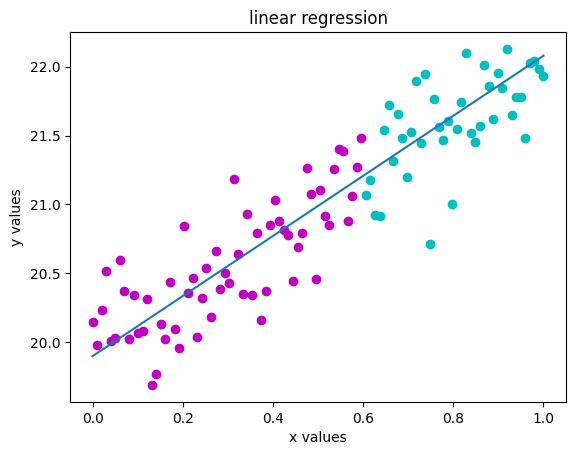

In [8]:
x_train, y_train = list(train_DB[:, 1]), list(train_DB[:, 2])
x_test, y_test = list(test_DB[:, 1]), list(test_DB[:, 2])
y_predict = [linear_regression(train_model_work["beta 0"], train_model_work["beta 1"], x) for x in x_test]

total_plot(x_train, y_train, x_test, y_test, 'om', 'oc', train_model_work, "linear regression")

#### Mean Squarred Error loss value

In [9]:
print(f"mse loss value: {mse_loss_function(y_test, y_predict)}")

mse loss value: 0.0771114768402018
